# Song Popularity Prediction(14 Baseline Models)
## Dataset
MLSpace is happy to present the first competition of the series.
This is a limited competition and everyone is welcome to join. To request invitation link visit MLSpace Discord: https://discord.gg/4RMwz64gdH

In this competition, you are supposed to predict the popularity of a song given features like acousticness, danceability, key, loudness, etc.


Max team size is 3 and you are allowed up to 7 submissions a day.
You can select 2 submission for final evaluation.


# Table of Contents
<a id="toc"></a>
- [1. Imports](#1)
- [2. Load Data](#2)
- [3. Target Distribution](#3)
- [4. Function for confusion matrix and classification report](#2)
- [5. Modelling](#2)
    - [5.1 Linear SVC](#5.1)
    - [5.2 Decision Tree](#5.2)
    - [5.3 Random Forest](#5.3)
    - [5.4 ADA Boost](#5.4)
    - [5.5 Bagging Classifier](#5.5)
    - [5.6 Extra Trees](#5.6)
    - [5.7 Gradient Boosting](#5.7)
    - [5.8 Light Gradient Boosting](#5.8)
    - [5.9 XGB](#5.9)
    - [5.10 SGD Classifier](#5.10)
    - [5.11 Ridge](#5.11)
    - [5.12 Passive Aggresive](#5.12)
    - [5.13 Perceptron](#5.13)
    - [5.14 MLP](#5.14)
- [6. Scores](#6)
- [7. Sample Submission](#7)

.
## Observations
- num_classes = 2
- Highly Imbalanced dataset

- No of models fitted - 14
- Boosting and tree based classifiers performed much better although each one of them needs to be finetuned as lots of FP,FN .
- Weighted classes shall be used as regularizers for better results.
## Contact

- [Click here ](https://twitter.com/bambose_) - to connect me on twitter











<a id="1"></a>
## Imports

In [196]:
import pandas as pd
import datatable as dt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, LogisticRegression, PassiveAggressiveClassifier,RidgeClassifierCV
from sklearn.neural_network import MLPClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, log_loss, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import (AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier,VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import cross_validate,cross_val_score,train_test_split, KFold, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


<a id="2"></a>
## Load Data

In [197]:
train = pd.read_csv("../input/song-popularity-prediction/train.csv")
test = pd.read_csv("../input/song-popularity-prediction/test.csv")
sample=pd.read_csv("../input/song-popularity-prediction/sample_submission.csv")

In [198]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train_im = pd.DataFrame(imputer.fit_transform(train))
test_im = pd.DataFrame(imputer.fit_transform(test))
#remove column
train_im.columns = train.columns
test_im.columns = test.columns

train = train_im
test = test_im

<a id="3"></a>
## Target distribution

In [199]:

pal=['#FFA15A','#00CC96']

fig = px.histogram(train, x="song_popularity", color="song_popularity", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.show()



In [200]:
TARGET = 'song_popularity'
FEATURES = [col for col in train.columns if col not in ['id', TARGET]]
cat_features = [col for col in FEATURES if test[col].nunique() < 15]
cont_features = [col for col in FEATURES if test[col].nunique() >= 15]
print(f'Continious features obtained {len(cont_features)} and categorical features obtained are {len(cat_features)}')

Continious features obtained 10 and categorical features obtained are 3


In [201]:
%%time
scale = RobustScaler()
#scale = MinMaxScaler()
#scale = StandardScaler()
train[cont_features]=scale.fit_transform(train[cont_features])
test[cont_features]= scale.transform(test[cont_features])  

print('Data scaled using : ', scale)

Data scaled using :  RobustScaler()
CPU times: user 42.1 ms, sys: 2.68 ms, total: 44.8 ms
Wall time: 57.8 ms


<a id="4"></a>
## Function for confusion matrix and classification report

In [202]:
def cnf_matrix_and_report(y_validation,y_prediction):
    cf_matrix = confusion_matrix(y_validation, y_prediction)
    sns_plot=sns.heatmap(cf_matrix, annot=True,  cmap='Blues')
    fig = sns_plot.get_figure()
    #fig.savefig("output.png")
    print(classification_report(y_validation, y_prediction))

In [203]:
#lets train only on 10% data and identify what models perform better and then later can develop a piepline for the best performing model.
X=train.drop(['song_popularity'],axis=1)
y=train.song_popularity
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.15,random_state=2001)

In [204]:
accuracy_list=[]
model_list=[]


<a id="5"></a>
## Modelling
<br><hr>
<br>
<a id="5.1"></a>
### Linear SVC

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



accuracy- 0.45266666666666666
              precision    recall  f1-score   support

         0.0       0.66      0.30      0.42      3842
         1.0       0.37      0.72      0.49      2158

    accuracy                           0.45      6000
   macro avg       0.51      0.51      0.45      6000
weighted avg       0.55      0.45      0.44      6000



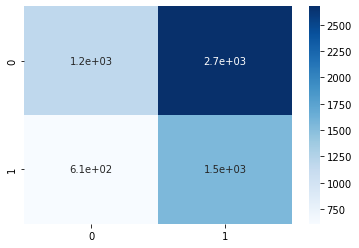

In [205]:
#1. Linear SVC

model_type='Linear_svc'
linear_svc=LinearSVC()
linear_svc.fit(X_train,y_train)
ypreds=linear_svc.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)


<a id="5.2"></a>
### Decision Tree

accuracy- 0.5466666666666666
              precision    recall  f1-score   support

         0.0       0.65      0.64      0.64      3842
         1.0       0.37      0.39      0.38      2158

    accuracy                           0.55      6000
   macro avg       0.51      0.51      0.51      6000
weighted avg       0.55      0.55      0.55      6000



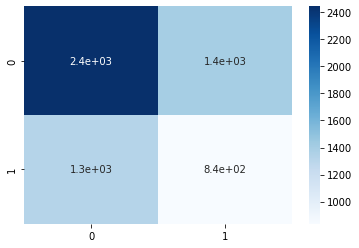

In [206]:
#2. Decision Tree
model_type='DecisionTreeClassifier'
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypreds=dt.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.3"></a>
### Random Forest


accuracy- 0.6341666666666667
              precision    recall  f1-score   support

         0.0       0.65      0.95      0.77      3842
         1.0       0.45      0.08      0.13      2158

    accuracy                           0.63      6000
   macro avg       0.55      0.51      0.45      6000
weighted avg       0.58      0.63      0.54      6000



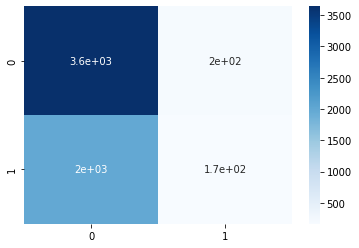

In [207]:
#3. Random Forest

model_type='RandomForestClassifier'
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
ypreds=clf.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)


​
<a id="5.4"></a>
### AdaBoost Classifier


accuracy- 0.6378333333333334
              precision    recall  f1-score   support

         0.0       0.64      0.97      0.77      3842
         1.0       0.46      0.04      0.08      2158

    accuracy                           0.64      6000
   macro avg       0.55      0.51      0.43      6000
weighted avg       0.58      0.64      0.52      6000



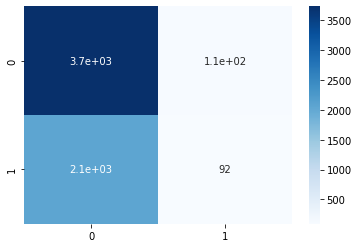

In [208]:
#4. AdaBoostClassifier

model_type='AdaBoostClassifier'
adb=AdaBoostClassifier()
adb.fit(X_train,y_train)
ypreds=adb.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.5"></a>
### Bagging Classifier


accuracy- 0.6131666666666666
              precision    recall  f1-score   support

         0.0       0.65      0.86      0.74      3842
         1.0       0.41      0.18      0.25      2158

    accuracy                           0.61      6000
   macro avg       0.53      0.52      0.50      6000
weighted avg       0.57      0.61      0.56      6000



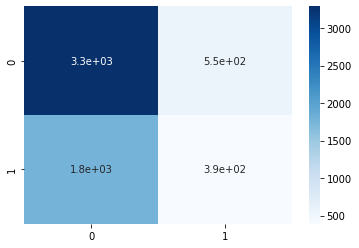

In [209]:
#5. BaggingClassifier

model_type='BaggingClassifier'
bagging=BaggingClassifier()
bagging.fit(X_train,y_train)
ypreds=bagging.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.6"></a>
### Extra Trees Classifier


accuracy- 0.6331666666666667
              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77      3842
         1.0       0.43      0.06      0.10      2158

    accuracy                           0.63      6000
   macro avg       0.54      0.51      0.44      6000
weighted avg       0.57      0.63      0.53      6000



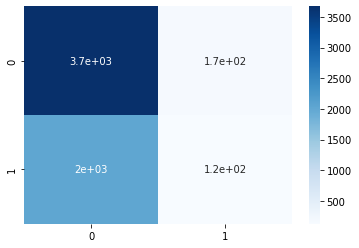

In [210]:
#6. ExtraTreesClassifier
model_type='ExtraTreesClassifier'
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
ypreds=etc.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.7"></a>
### Gradient Boosting


accuracy- 0.639
              precision    recall  f1-score   support

         0.0       0.64      0.99      0.78      3842
         1.0       0.43      0.01      0.02      2158

    accuracy                           0.64      6000
   macro avg       0.54      0.50      0.40      6000
weighted avg       0.57      0.64      0.51      6000



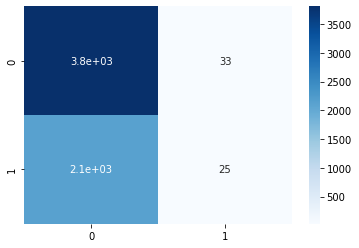

In [211]:
#7. GradientBoostingClassifier
model_type='GradientBoostingClassifier'
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
ypreds=gbc.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.8"></a>
### Light Gradient Boosting


accuracy- 0.6378333333333334
              precision    recall  f1-score   support

         0.0       0.64      0.97      0.77      3842
         1.0       0.47      0.05      0.09      2158

    accuracy                           0.64      6000
   macro avg       0.56      0.51      0.43      6000
weighted avg       0.58      0.64      0.53      6000



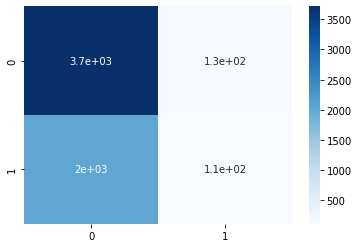

In [212]:
#8. LGBMClassifier
model_type='LGBMClassifier'
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
ypreds=lgbm.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)





<a id="5.9"></a>
### XgBoost


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:28:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy- 0.618
              precision    recall  f1-score   support

         0.0       0.65      0.88      0.75      3842
         1.0       0.41      0.14      0.21      2158

    accuracy                           0.62      6000
   macro avg       0.53      0.51      0.48      6000
weighted avg       0.56      0.62      0.56      6000



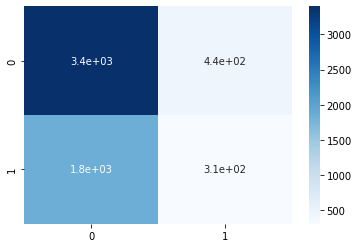

In [213]:
#9 XGBClassifier
model_type='XGBClassifier'
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
ypreds=xgb.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.10"></a>
### Stocastic gradient Descent


accuracy- 0.64
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3842
         1.0       0.33      0.00      0.00      2158

    accuracy                           0.64      6000
   macro avg       0.49      0.50      0.39      6000
weighted avg       0.53      0.64      0.50      6000



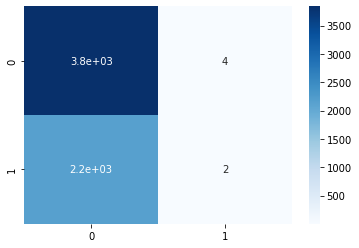

In [214]:
#10 SGDClassifier
model_type='SGDClassifier'
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
ypreds=sgd.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.11"></a>
### Ridge Classifier


accuracy- 0.641
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78      3842
         1.0       0.75      0.00      0.01      2158

    accuracy                           0.64      6000
   macro avg       0.70      0.50      0.39      6000
weighted avg       0.68      0.64      0.50      6000



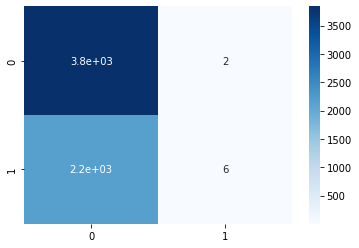

In [215]:
#11 Ridge Classifier
model_type='Ridge Classifier'
rgc=RidgeClassifierCV()
rgc.fit(X_train,y_train)
ypreds=rgc.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.12"></a>
### Perceptron


accuracy- 0.3596666666666667
              precision    recall  f1-score   support

         0.0       0.50      0.00      0.00      3842
         1.0       0.36      1.00      0.53      2158

    accuracy                           0.36      6000
   macro avg       0.43      0.50      0.27      6000
weighted avg       0.45      0.36      0.19      6000



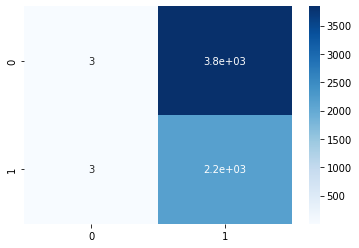

In [216]:
#12 Perceptron
model_type='Perceptron'
percp=Perceptron()
percp.fit(X_train,y_train)
ypreds=percp.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.13"></a>
### Passive Aggresive


accuracy- 0.39116666666666666
              precision    recall  f1-score   support

         0.0       0.71      0.08      0.15      3842
         1.0       0.37      0.94      0.53      2158

    accuracy                           0.39      6000
   macro avg       0.54      0.51      0.34      6000
weighted avg       0.58      0.39      0.29      6000



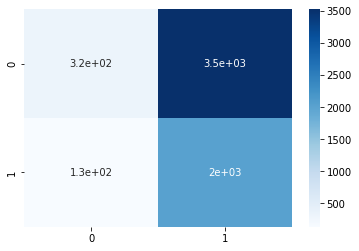

In [217]:
#13 passive aggresive
model_type='Passive Aggresive'
pac=PassiveAggressiveClassifier()
pac.fit(X_train,y_train)
ypreds=pac.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)



<a id="5.14"></a>
### MLP


accuracy- 0.6373333333333333
              precision    recall  f1-score   support

         0.0       0.64      0.99      0.78      3842
         1.0       0.35      0.01      0.02      2158

    accuracy                           0.64      6000
   macro avg       0.50      0.50      0.40      6000
weighted avg       0.54      0.64      0.50      6000



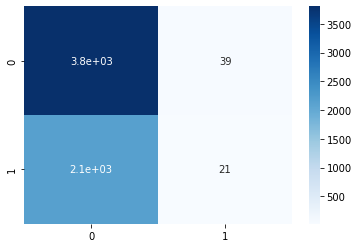

In [218]:
#14 MLP sklearn
model_type='MLP'
mlp=MLPClassifier()
mlp.fit(X_train,y_train)
ypreds=mlp.predict(X_valid)
accuracy=accuracy_score(ypreds,y_valid)
print(f'accuracy- {accuracy}')
cnf_matrix_and_report(y_valid,ypreds)
accuracy_list.append(accuracy)
model_list.append(model_type)


In [219]:
list_of_tuples = list(zip(model_list, accuracy_list))
df = pd.DataFrame(list_of_tuples, columns = ['Models', 'scores'])
df=df.sort_values(by='scores', ascending=False)
df=df.reset_index(drop=True)


<a id="6"></a>
## Scores plot


In [220]:
fig = px.bar(df, x='Models', y='scores',color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

# My Observations
**14 models fitted.**
We can see that some models performed better than others but there is  huge class imbalance and that is going to affect the f1 score.

The next step for model training can be finetuning the hyperparams for top 5 models on a single fold and then further full training on 10 fold dataset with including weighted classes.

Further more the next step should be get the feature importance of this dataset, we might use a few tecniques to get the important features.





<a id="7"></a>
## Sample Submission


In [223]:
test_pre = lgbm.predict(test)
sample.song_popularity = test_pre
sample.to_csv("Submission_lgbm.csv",index=False)
print("success")

success
